import neccesary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


load the dataset

In [3]:
spotify_df =pd.read_csv("spotify_history.csv")
spotify_df

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,08-07-2013 02:44,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,08-07-2013 02:45,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,08-07-2013 02:50,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,08-07-2013 02:52,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,08-07-2013 03:17,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False
...,...,...,...,...,...,...,...,...,...,...,...
149855,4Fz1WWr5o0OrlIcZxcyZtK,15-12-2024 23:06,android,1247,On The Way Home,John Mayer,Paradise Valley,fwdbtn,fwdbtn,True,True
149856,0qHMhBZqYb99yhX9BHcIkV,15-12-2024 23:06,android,1515,Magical Mystery Tour - Remastered 2009,The Beatles,Magical Mystery Tour,fwdbtn,fwdbtn,True,True
149857,0HHdujGjOZChTrl8lJWEIq,15-12-2024 23:06,android,1283,"Stop This Train - Live at the Nokia Theatre, L...",John Mayer,Where the Light Is: John Mayer Live In Los Ang...,fwdbtn,fwdbtn,True,True
149858,7peh6LUcdNPcMdrSH4JPsM,15-12-2024 23:06,android,1306,I Don't Trust Myself (With Loving You),John Mayer,Continuum,fwdbtn,fwdbtn,True,True


convert timestamp to datetime

In [15]:
spotify_df['ts'] =pd.to_datetime(spotify_df['ts'], dayfirst= True)

spotify_df['ts']

0        2013-07-08 02:44:00
1        2013-07-08 02:45:00
2        2013-07-08 02:50:00
3        2013-07-08 02:52:00
4        2013-07-08 03:17:00
                 ...        
149855   2024-12-15 23:06:00
149856   2024-12-15 23:06:00
149857   2024-12-15 23:06:00
149858   2024-12-15 23:06:00
149859   2024-12-15 23:06:00
Name: ts, Length: 149860, dtype: datetime64[ns]

check for missing valuues

In [17]:
missing_values = spotify_df.isnull().sum()
missing_values

spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64

fill missing values

In [19]:
spotify_df['reason_start'] = spotify_df['reason_start'].fillna('unknown')
spotify_df['reason_end']= spotify_df['reason_end'].fillna('unknown')

to cross check for missing value

In [20]:
print(spotify_df.isnull().sum())

spotify_track_uri    0
ts                   0
platform             0
ms_played            0
track_name           0
artist_name          0
album_name           0
reason_start         0
reason_end           0
shuffle              0
skipped              0
dtype: int64


total listening time

In [22]:
total_hours = spotify_df['ms_played'].sum()/(1000 *60* 60)
total_hours

np.float64(5341.489019166666)

top 10 most played songs

In [24]:
top_songs = spotify_df.groupby('track_name')['ms_played'].sum().sort_values(ascending=False).head(10)
top_songs

track_name
Ode To The Mets                                                                        67431580
The Return of the King (feat. Sir James Galway, Viggo Mortensen and Renee Fleming)     64401661
The Fellowship Reunited (feat. Sir James Galway, Viggo Mortensen and Renée Fleming)    44756730
19 Dias y 500 Noches - En Directo                                                      42914042
In the Blood                                                                           38427087
Claudia's Theme - Version Eight                                                        37120900
Dying Breed                                                                            36182653
The Breaking of the Fellowship (feat. "In Dreams")                                     35990898
All These Things That I've Done                                                        35754915
Caution                                                                                35619945
Name: ms_played, dtype: int64

charts for top songs

C:\Users\Dell\AppData\Local\Temp\ipykernel_3040\2609721046.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_songs.values,y= top_songs.index,palette="Blues")


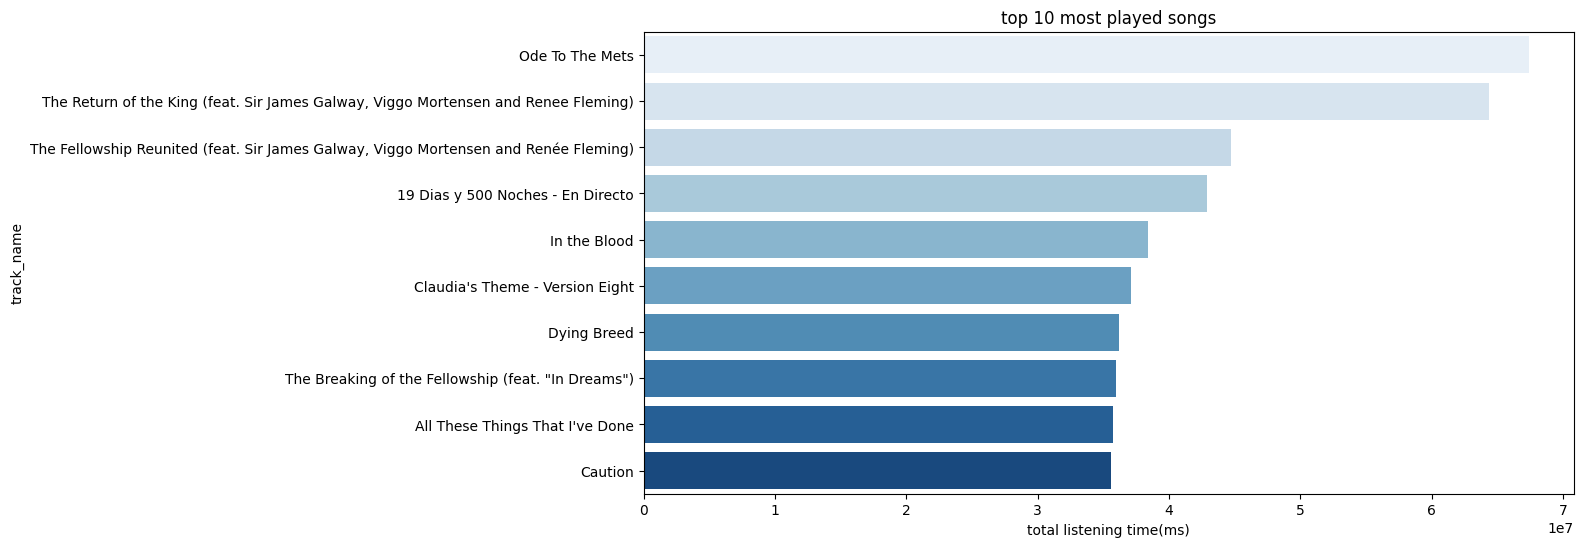

In [41]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_songs.values,y= top_songs.index,palette="Blues")
plt.title("top 10 most played songs")
plt.xlabel("total listening time(ms)")
plt.show()

most played artists

In [27]:
top_artists = spotify_df.groupby('artist_name')['ms_played'].sum().sort_values(ascending=False).head(10)
top_artists

artist_name
The Beatles           1210184552
The Killers           1059556516
John Mayer             725047749
Bob Dylan              569456396
Paul McCartney         357354370
Howard Shore           348930675
The Strokes            317508419
The Rolling Stones     307917009
Pink Floyd             260531842
Led Zeppelin           248338279
Name: ms_played, dtype: int64

chart for the top 10 artist

C:\Users\Dell\AppData\Local\Temp\ipykernel_3040\3647954576.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values,y=top_artists.index,palette="coolwarm")


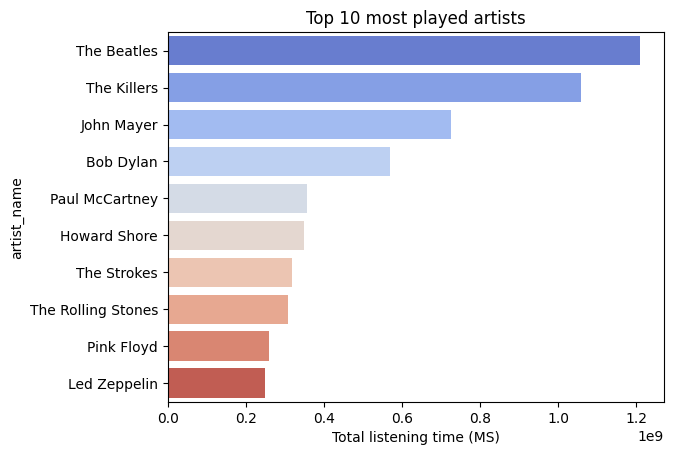

In [44]:
plt.Figure(figsize=(12,6))
sns.barplot(x=top_artists.values,y=top_artists.index,palette="coolwarm")
plt.title("Top 10 most played artists")
plt.xlabel("Total listening time (MS)")
plt.show()

listening trends over time

C:\Users\Dell\AppData\Local\Temp\ipykernel_3040\227719127.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  spotify_df.set_index('ts').resample('M')['ms_played'].sum().plot(kind='line', title="yearly Listening Trend")


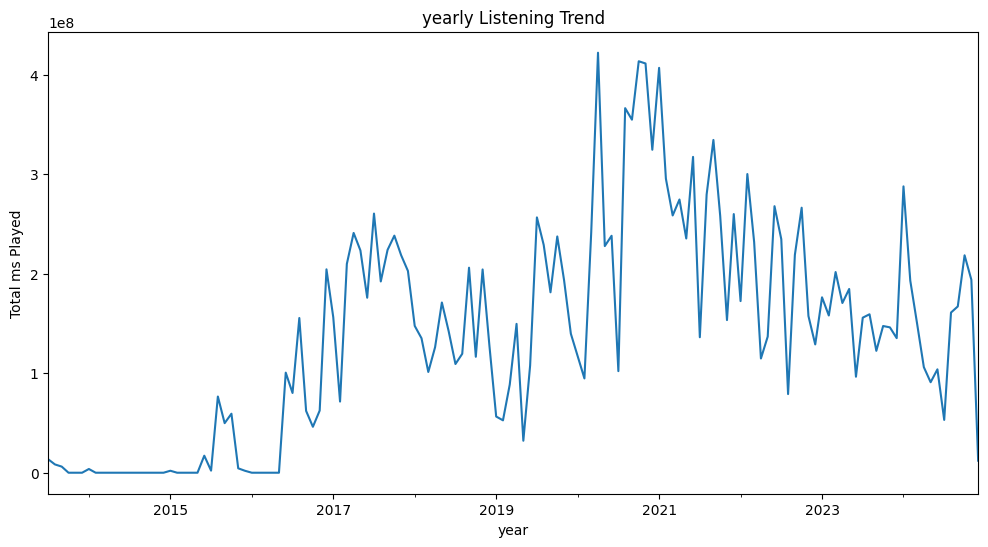

In [65]:
plt.figure(figsize=(12, 6))
spotify_df.set_index('ts').resample('M')['ms_played'].sum().plot(kind='line', title="yearly Listening Trend")
plt.xlabel("year")
plt.ylabel("Total ms Played")
plt.show()

skip rate

In [29]:
skip_rate = spotify_df['skipped'].mean() * 100
print("Skip Rate (%):", skip_rate)


Skip Rate (%): 5.250900840784732


most skipped songs

In [30]:
skipped_songs = spotify_df[spotify_df['skipped']].groupby('track_name').size().sort_values(ascending=False).head(10)
skipped_songs


track_name
Paraíso                                              29
Photograph                                           22
Superheroes                                          21
What Do You Mean?                                    20
Switzerland                                          20
Old Thing Back (feat. Ja Rule and Ralph Tresvant)    19
Drag Me Down                                         18
Diez Mil Maneras                                     18
La Buena y la Mala                                   15
Stitches                                             14
dtype: int64

chart for most skipped songs 

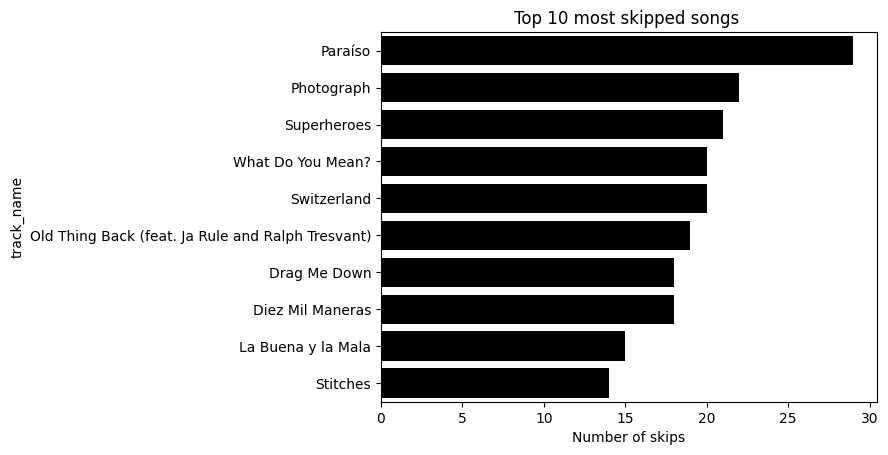

In [48]:
plt.Figure(figsize=(12,6))
sns.barplot(x=skipped_songs.values,y= skipped_songs.index,color="black")
plt.title("Top 10 most skipped songs ")
plt.xlabel("Number of skips")
plt.show()

platform usage

In [33]:
platform_usage = spotify_df['platform'].value_counts()
platform_usage

platform
android           139821
cast to device      3898
iOS                 3049
windows             1691
mac                 1176
web player           225
Name: count, dtype: int64

platform usage chart

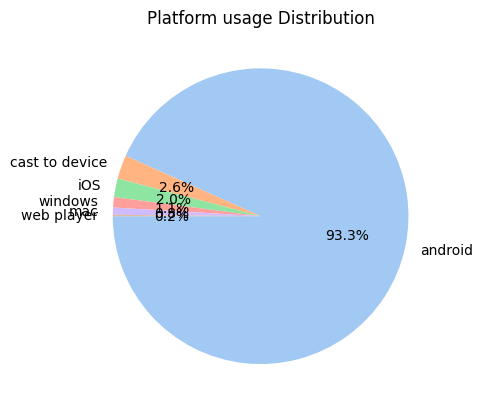

In [60]:
plt.Figure(figsize=(10,10))
plt.pie(platform_usage,labels= platform_usage.index,autopct= '%1.1f%%',colors=sns.color_palette("pastel"),startangle=180)
plt.title("Platform usage Distribution")
plt.show()

reasons for starting and ending a song

In [34]:
start_reasons = spotify_df['reason_start'].value_counts()
start_reasons


reason_start
trackdone     76655
fwdbtn        53793
clickrow      11228
appload        3729
backbtn        2205
playbtn        1458
remote          477
Unknown         143
trackerror      120
unknown          23
nextbtn          21
popup             5
endplay           2
autoplay          1
Name: count, dtype: int64

In [35]:
end_reasons = spotify_df['reason_end'].value_counts()
end_reasons

reason_end
trackdone                       77194
fwdbtn                          53470
endplay                         10119
logout                           4367
backbtn                          2182
unexpected-exit-while-paused     1725
unknown                           268
remote                            224
unexpected-exit                   118
Unknown                           117
clickrow                           34
nextbtn                            21
appload                             7
popup                               6
reload                              4
trackerror                          4
Name: count, dtype: int64

listening behaviours

In [61]:
shuffle_counts = spotify_df['shuffle'].value_counts()
shuffle_counts

shuffle
True     111583
False     38277
Name: count, dtype: int64

the chart for the listening behaviours

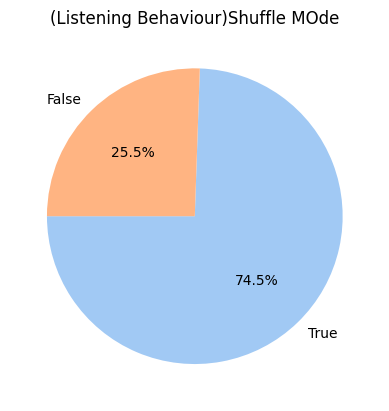

In [63]:
plt.Figure(figsize=(8,6))
plt.pie(shuffle_counts,labels= shuffle_counts.index,autopct= '%1.1f%%',colors=sns.color_palette("pastel"),startangle=180)
plt.title("(Listening Behaviour)Shuffle MOde")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_3040\759875112.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shuffle_counts.index,y= shuffle_counts.values,palette="mako")


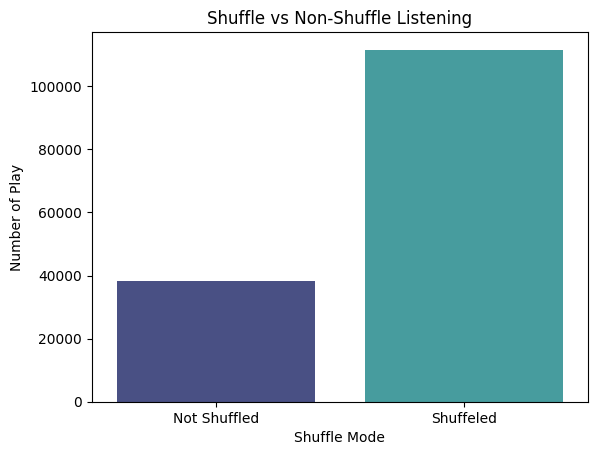

In [ ]:
plt.Figure(figsize=(8,6))
sns.barplot(x=shuffle_counts.index,y= shuffle_counts.values,palette="mako")
plt.title("Shuffle vs Non-Shuffle Listening")
plt.xlabel("Shuffle Mode")
plt.ylabel("Number of Play")
plt.xticks([0,1],["Not Shuffled","Shuffled"])
plt.show()